In [66]:
# read data
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.pyplot import *
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from IPython.display import HTML
import plotly.express as px

In [67]:
data_url = "https://health-infobase.canada.ca/src/data/covidLive/covid19.csv"
data_filename = 'Covid19.csv'
#your path should be:

data_path = 'Covid19.csv'

In [68]:
#data cleaning
#df = df[['testedtoday', 'ratetested', 'numtested']].dropna()
 #df.drop(["numtested"])
    #df=drop.df[df['prname']=='Canada']
   

In [69]:
#If the data has not yet been downloaded, download it now
if not os.path.exists(data_filename):
    r = requests.get(data_url, allow_redirects=True)
    open(data_filename, 'wb').write(r.content)

In [70]:
df = pd.read_csv(data_filename, parse_dates=True, index_col=0)


In [71]:
df.head(5)

,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday,ratetotal,deathstoday,testedtoday,recoveredtoday
pruid,,,,,,,,,,,,,,,,,
35,Ontario,Ontario,31-01-2020,3,0,0.0,3,NaN,NaN,NaN,NaN,3.0,300.0,0.021,0.0,NaN,NaN
59,British Columbia,Colombie-Britannique,31-01-2020,1,0,0.0,1,NaN,NaN,NaN,NaN,1.0,100.0,0.020,0.0,NaN,NaN
1,Canada,Canada,31-01-2020,4,0,0.0,4,NaN,NaN,NaN,NaN,4.0,400.0,0.011,0.0,NaN,NaN
35,Ontario,Ontario,08-02-2020,3,0,0.0,3,NaN,NaN,NaN,NaN,0.0,0.0,0.021,0.0,NaN,NaN
59,British Columbia,Colombie-Britannique,08-02-2020,4,0,0.0,4,NaN,NaN,NaN,NaN,3.0,300.0,0.079,0.0,NaN,NaN


In [72]:
#df.drop(df.index[1])
fig1 = px.bar(df, x='prname', y='numconf',orientation='v',color='date')
fig1.show()

In [73]:
import plotly.graph_objects as go
fig = go.Figure(go.Scatter(x = df['prname'], y = df['numconf'],
                  name='Share Prices (in USD)'))
fig.show()

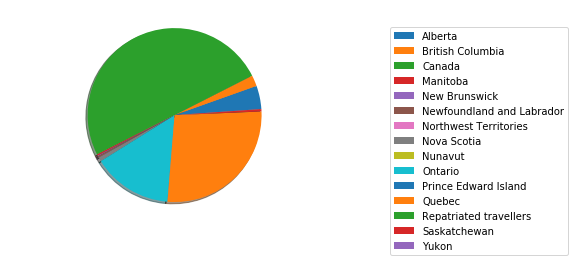

In [74]:

from matplotlib.pyplot import pie, axis, show

#colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
sums = df.groupby(df["prname"])["numconf"].sum()
axis('equal');
pie(sums,startangle=4, shadow = True,rotatelabels =True,);

plt.legend(labels, bbox_to_anchor=(1,0), loc="lower left", 
                          bbox_transform=plt.gcf().transFigure)

show()
#labels=sums.index
# autopct='%1.1f%%',

In [75]:
fig = px.line(df, x = 'date', y = 'numconf', title='nothing')
fig.show()

[Text(0, 0, 'Ontario'),
 Text(0, 0, 'British Columbia'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Quebec'),
 Text(0, 0, 'Alberta'),
 Text(0, 0, 'Saskatchewan'),
 Text(0, 0, 'Manitoba'),
 Text(0, 0, 'New Brunswick'),
 Text(0, 0, 'Newfoundland and Labrador'),
 Text(0, 0, 'Nova Scotia'),
 Text(0, 0, 'Prince Edward Island'),
 Text(0, 0, 'Northwest Territories'),
 Text(0, 0, 'Nunavut'),
 Text(0, 0, 'Yukon'),
 Text(0, 0, 'Repatriated travellers')]

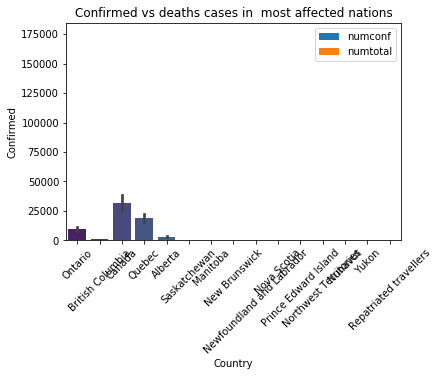

In [76]:
import seaborn as sns
df[['numconf','numtotal','prname']].plot(kind='bar', stacked=True)
chart = sns.barplot(
    data=df,
    x= df['prname'],
    y = df['numconf'],
    palette='viridis'
)
chart.set(xlabel='Country', ylabel='Confirmed', title = 'Confirmed vs deaths cases in  most affected nations')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

[Text(0, 0, 'Ontario'),
 Text(0, 0, 'British Columbia'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Quebec'),
 Text(0, 0, 'Alberta'),
 Text(0, 0, 'Saskatchewan'),
 Text(0, 0, 'Manitoba'),
 Text(0, 0, 'New Brunswick'),
 Text(0, 0, 'Newfoundland and Labrador'),
 Text(0, 0, 'Nova Scotia'),
 Text(0, 0, 'Prince Edward Island'),
 Text(0, 0, 'Northwest Territories'),
 Text(0, 0, 'Nunavut'),
 Text(0, 0, 'Yukon'),
 Text(0, 0, 'Repatriated travellers')]

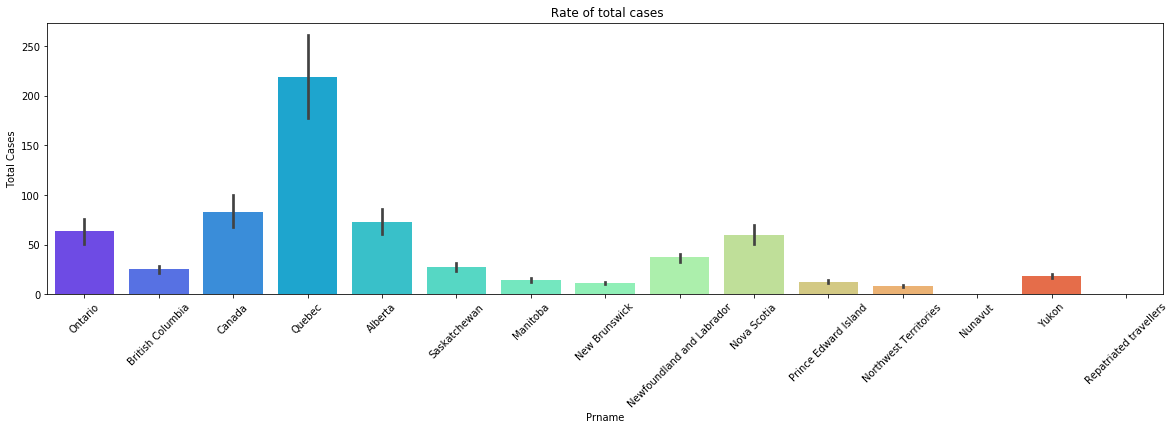

In [77]:

plt.figure(figsize=(20,5))
chart = sns.barplot(
    data=df,
    x= 'prname',
    y = 'ratetotal',
    palette='rainbow'
)
chart.set(xlabel='Prname', ylabel='Total Cases', title = ' Rate of total cases')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [78]:
Confirmed = df.groupby(['prname']).sum()